# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 9 </span>

### Exercise 09.1 : Il Problema del Commesso Viaggatore (STP) - Algoritmo Genetico (GA)

### Obiettivo

In questa esercitazione l'obiettivo è quello di risolvere il **problema del commesso viaggiatore(STP)** con un **algoritmo genetico(GA)**.

Tale problema di **ottimizzazione** combinatoria può essere presentato nel seguente modo: trovare il percorso di lunghezza minima che deve percorrere un commesso viaggiatore per visitare $N_{city}$ città, una e una sola volta, concludendo sempre il suo tour nella città dalla quale era partito.

Considerando, quindi, $N_{city}$ disposte casualmente su un piano, caratterizzate dalle posizioni $\vec{c}_i$, la sfida è quella di trovare la sequenza di città che minimizza la seguente funzione costo:
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

ossia la somma dei moduli delle distanze tra le città visitate, con $\vec{x}_{N+1}=\vec{x}_1$ (**Pbc**), che rappresenta una specifica permutazione, P, della sequenza ordinata di città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

L'insieme delle possibili soluzioni candidate al problema è finito ma incredibilmente grande. Inoltre la possibilità di finire e rimanere intrappolati in qualche minimo locale della funzione obiettivo $L^{(2)}$ è elevata. Per questo si è deciso di affrontare la risoluzione del problema con un algoritmo **metaeuristico**, caratterizzato da componenti di natura stocastica.

Il problema di ottimizzazione, nel corso dell'esercitazione, sarà applicato per risolvere due sistemi composti  da $N_{city} = 34$ città disposte casualmente:

**1)** su una **circonferenza** di lato raggio $r=1$.

**2)** all'interno di un **quadrato** di lato $l=2$.

Per entrambi i problemi è richiesta:

- Un'immagine che ritragga il **migliore percorso in assoluto** trovato dall'algoritmo.


- Due grafici che riportino, rispettivamente, l'andamento di $L^{(1)}$ del migliore percorso e di $\langle L^{(1)}\rangle$, mediato sulla metà migliore della popolazione accompagnata dalla relativa incertezza (deviazione standard dalla media), in funzione delle **generazioni** (progressivamente aggiornate) che costituiscono la *run* dell'algoritmo.



### Algoritmo Genetico e codice C++

Gli algoritmi genetici, introdotti da *Holland* negli anni 60, non sono altro che l'**astrazione** di un processo di **evoluzione biologica**. Lo scopo è di studiare il fenomeno dell'**adattamento naturale** per sviluppare metodi che consentano di importarlo nelle simulazioni numeriche per risolvere problemi di ottimizzazione basandosi sul meccanismo della **selezione naturale** e della genetica.

Tra i suoi principali vantaggi, questo alagoritmo lavora *intrinsecamente* in **parallello**, permettendo di esplorare contemporaneamente numerose soluzioni candidate al problema di ottimizzazione in modo efficiente. In relazione al TSP tale procedura porta solo a numerosi benefici.

In generale, nel contesto dell'evoluzione biologica, una specie si evolve per mezzo di variazioni **casuali** (mutazioni e ricombinazioni) rispettando il principio della **selezione naturale** secondo il quale gli individui che meglio si adattano alle condizioni ambientali tendono a sopravvivere e riprodursi trasferendo il proprio materiale genetico alle generazioni successive.

Innanzitutto, nell'implementazione del codice, sono state scritte delle classi che definissero gli **elementi** dell'algoritmo genetico:

- La classe *City* (i cosiddetti **geni** nel linguaggio standard dei GAs) che possiede come data membri privati le coordinate della posizione della città nel piano e una label che etichetta la città, infatti, è stata adottata la scelta di una **rappresentazione 1D** per il cammino eseguito nel tempo dal commesso viaggiatore. Essa è dotata di numerosi metodi tra cui il più importante, ai fini del TSP, è quello che calcola la distanza tra due città (*Distanza(...) *) $|\vec{x}_i-\vec{x}_j|$ .


- La classe *Individual* (i cosiddetti **cromosomi**) che identifica una sequenza di città usando come data membro privato un *vector* di City. L'individuo rappresenta un **candidato** alla soluzione del problema del TSP. Dunque un generico individuo è rappresentato, idealmente, da una stringa di città etichettate (con label che assumono valori da $index = 0,1,...,N_{city} -1$) che specificano il percorso compiuto dal commesso durante il suo tour. Per esempio l'individuo $[3,6,7,....,27]$ indica che il commesso visita la terza città all'inizio del percorso, nella seconda tappa si ferma alla sesta città e come ultima tappa, prima di tornare al punto di partenza, visita la ventissettesima città. Anche questa possiede numerosi metodi tra cui i principali sono:


1. *Check()*: verifica che ciascun individuo (creato,prodotto, ricombinato o mutato) rispetti le condizioni al contorno, i vincoli del problema di ottimizzazione, ossia controlla che ciascuna stringa sia una permutazione della sequenza di label delle $N_{city}$ (senza ripetizione).


2. *Shuffle()*: rimescola l'ordine delle città visitate dal commesso all'interno dell'individuo in modo casuale.


3. *CostFun()*: Calcola il cosiddetto **fitness** dell'individuo, ossia una misura quantitativa di quanto un generico individuo sia una buona soluzione candidata per il problema di ottimizzazione, valutando la funzione costo $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$ con $i=0,...34$ e rispettando le Pbc $\vec{x}_{34}=\vec{x}_0$. Tanto minore sarà la distanza percorsa dal commesso ($L^{(1)}$) tanto migliore sarà la soluzione candidata presa in considerazione.


4. *Gen_Mut_(number)*: gli operatori di **mutazione genetica** aggiungono la possibilità di **permutare**, **modificare**, **invertire**, gruppi o coppie di città all'interno del singolo individuo, tranne la prima città. Infatti, per ridurre la **degenerazione** del percorso più breve (fino ad un grado 2, senso di percorrenza orario o antiorario) si è deciso di lasciare la prima città sempre al primo posto in qualsiasi sequenza prodotta. Si osservi che tale operatore distrugge vecchie soluzioni e ne produce di nuove simulando ciò che biologocamente si verifica nella realtà e realizzando quella componente di **diversificazione** che ogni buon algortimo metaeuristico deve possedere. La loro presenza impedisce, dunque, di rimanere intrappolati in minimi **locali** troppo a lungo, consentendo un'esplorazione dello spazio di ricerca delle soluzioni su scala **globale**. Nel codice ne sono stati implementati 4 (seguendo i suggerimenti proposti nel notebook delle consegne):

    - *Gen_Mut_1(int i,int j)*: effettua una permutazione scambiando l'i-esima città dell'individuo selezionato con la j-esima, estraendo casualmente le variabili nel rispetto delle Pbc. Per quanto detto in precedenza la città iniziale non deve essere coinvolta.
    
    - *Gen_Mut_2(int index, int shift,int contigcity)*: effettua lo spostamento di $contigcity$ città contigue di $shift$ posizioni indietro ($contigcity < N_{city} -1$), con $index$ che indica la posizione della prima città da spostare. Sia la variabile $index1$ che $contigcity$ sono estratte casualmente in modo da rispettare le Pbc.
      
    - *Gen_Mut_3(int index1 ,Random* rnd, int contigcity)*:  effettua una permutazione scambiando $contigcity$ città contigue (eccetto la prima) con altre differenti $contigcity$ città contigue ($contigcity < \frac{N_{city}}{2}$), con $index1$ che indica la posizione della prima città tra quelle contigue. Sia la variabile $index1$ che $contigcity$ sono estratte casualmente in modo da rispettare le Pbc.
    
    - *Gen_Mut_4(int index ,int contigcity)*: effettua una permutazione invertendo l'ordine con cui appaiono nel percorso $contigcity$ città (esclusa la prima e con $contigcity < N_{city}$), con $index1$ che indica la posizione della prima città tra quelle contigue da invertire. Sia la variabile $index1$ che $contigcity$ sono estratte casualmente in modo da rispettare le Pbc. 


- La classe *Population* che identifica un insieme di individui (popolazione) esistenti ad un dato istante della simulazione genetica usando come data membro privato un *vector* di Individual. Essa permette all'algoritmo genetico di lavorare su un'insieme di soluzioni (parallelismo intrinseco) piuttosto che su una singola soluzione. Anche quest'ultima classe è arricchita da svariati metodi tra cui i più importanti sono:


1. *StartingPop()*: il quale genera casualmenta la popolazione di partenza sfruttando il metodo *Shuffle()*.


2. *SortPop()*: riordina gli individui appartenenti alla medesima popolazione in funzione del loro fitness, o meglio della loro funzione costo. I primi individui nella sequenza ordinata sono quelli che mostrano un migliore adattamento, cioè un valore minore di $L^{(1)}$.


3. *Selection(...)*: l'operatore di **selezione** che estrae dalla popolazione gli individui in modo che si possano riprodurre. La selezione sfrutta il precedente ordinamento della popolazione ed estrae l'individuo $j$ con la seguente procedura: $j=N\times int(r^p)$ dove $r$ è un numero casuale uniformemente distribuito nell'intervallo $[0,1)$ and $p$ è un opportuno esponente(**peso**) settato pari a $p=2$ affinchè gli individui con l'adattamento migliore possano essere selezionati più frequentemente per riprodursi (una sorta di *roulette truccata*).


4. *Mutation(...)*: imposta quale operatore di mutazione (tra i 4 disponibili) applicare, con una certa probabilità, agli individui genitori e figli quando si sta formando la successiva generazione (ossia la nuova popolazione).


5. *CrossOver(...)*: selezionati i due individui genitori, essi trasferiscono il proprio materiale genetico (le città) alla prole (i 2 figli) mescolando e cambiando tale materiale in modo opportuno, secondo quanto descritto nel notebook delle consegne. Si opera un taglio degli individui genitori (ossia i percorsi) in corrispondenza della stessa posizione, si conserva la prima parte di entrambi e si completa la parte dopo la cesura con le città mancanti rispettando l'ordine in cui esse appaiono nel proprio consorte. La prole così riprodotta può essere aggiunta (evventualmente mutata) alla nuova generazione in via di formazione.


6. PrintBest(...) e PrintHalfAverage(...): eseguono la stampa dei risulati su file di output *Best_Individual_Evolution_(circle/square).dat*, *Average_Individuals_Evolution(circle/square).dat* e *Best_Individual_(circle/square).dat*



Definita questa struttura di base e la rappresentazione utilizzata per le soluzioni candidate ai problemi dell'esercitazione il codice C++ implementa l'algoritmo genetico che funziona e procede nel modo seguente (*Travelling_Salesman_Problem_TSP.cpp*):

1. Inizializza  e predispone il programma per risolvere il problema, con la routine *Input()*, leggendo dal file *input.dat*  (dove vengono sovrascritti i file *input.circle(square)* con gli opportuni comandi del makefile) tutti i parametri necessari per eseguire la simulazione: il numero di città da visitare $N_{city} = 34$; il numero di individui che costituiscono una popolazione:  $N_{ind} = 100$ per le città sulla circonferenza e $N_{ind} = 200$ per le città nel quadrato ; il numero di generazioni prodotte dall'algoritmo $N_{gen} = 1000$; le coordinate sul piano della posizione della città di partenza e di arrivo *xstart_city* e *ystart_city*; una variabile intera *circle_or_square* che decide, settando il proprio valore a 1 o 0, se le città, rispettivamente, sono disposte sulla circonferenza oppure all'interno del quadrato; il peso dell'esponente dell'operatore di selezione; le probabilità con le quali possono avvenire il crossover (ricombinazione) ($P_c = 60\%$) e le mutazioni ($P_m = 5\%$). Inoltre genera casualmente le coordinate delle città costruendo il primo individuo, costruisce la prima popolazione, rimescola in modo casuale l'ordine delle città negli individui della popolazione di partenza (*StartingPop()*), verifica che rispettino i vincoli (*Check()*), li riordina (*SortPop()*) ed esegue una prima stampa.

2. Ripete per un numero di iterazioni pari alle generazioni date in input la seguente procedura:
 
    - La routine *Reset()*, ad ogni selezione, costruisce la popolazione temporanea copiandovi la vecchia popolazione (*old_pop*) e sulla quale applicherà gli operatori di crossover e mutazione permettendo di lavorare su una popolazione copia. In questo modo viene permesso ad un individuo di essere selezionato più di una volta per diventare genitore e avere la possibilità di riprodursi. Si pensi ai percorsi ottimali candidati per la soluzione al problema, essi hanno una maggiore probabilità di passare il loro materiale genetico alla prole. Questa condizione, inoltre, soddifa, almeno in parte, il secondo requisito fondamentale per un algoritmo metaeuristico: l'**intensificazione** che permette di concentrare la ricerca in quella regione dove è già stato trovato un buon individuo.

    - La routine *Cross_Mut()* seleziona i due individui genitori e applica l'operatore di crossover e mutazione con le relative probabilità caratteristiche. Si osservi che se l'operazione di crossover non dovesse avere luogo la prole sarà la copia identica dei genitori seleziontai soggetti, eventualmente, anch'essi a mutazione genetica.

    - La routine *Accumulate()* costruisce la nuova popolazione (*new_pop*) accumulando progressivamente la prole prodotta con i precedenti steps. 
       
    - **N.B.**: Questi tre passaggi vengono ripetuti fino a che non sono stati selezionati $N_{ind}$  individui per riprodursi e sostituire la vecchia popolazione con la nuova conservando il numero di individui di partenza. Può accadere che degli individui genitori non siano soggetti nè a crossover nè a mutazione giungendo inalterati alla popolazione successiva.
  
    - Si riordina la nuova popolazione (*SortPop()*), si verifica che i nuovi individui rispettino i vincoli del problema di ottimizzazione, si eseguono le stampe dei risultati progressivamente sui file di output con la routine *PrintResults()* e si copia la nuova popolazione in quella vecchia con la routine *Restart()* pronti per ricominciare la procedura.


I risultati sono mostrati e commentati qui di seguito.

34 cities randomly placed on a circumference
The Length of the best path:  6.24867
Averaged length on the best half of the last population:  6.24867 +/- 3.9e-07


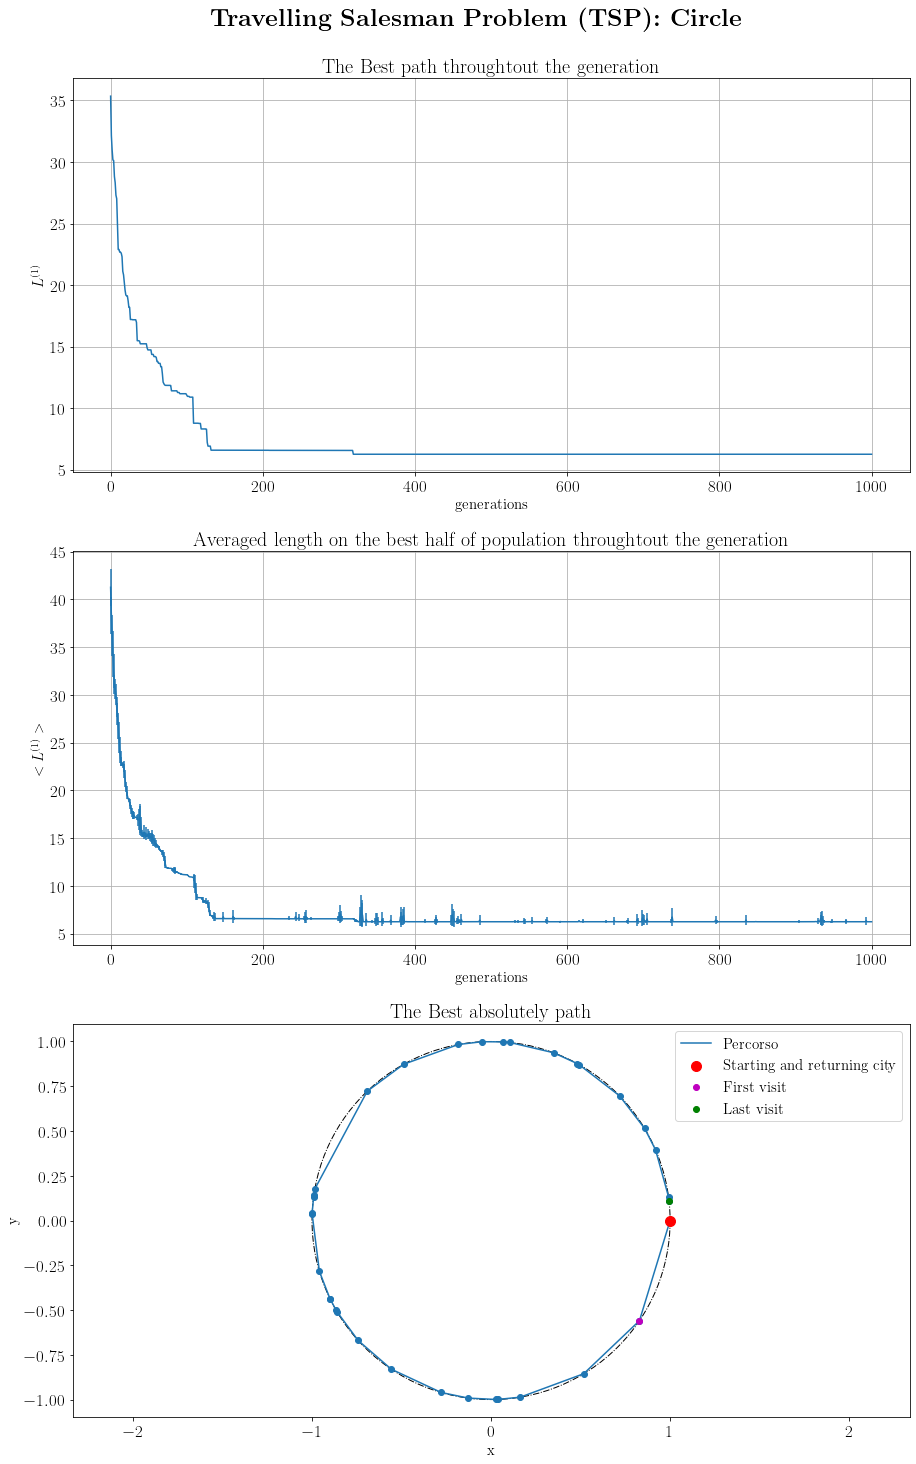

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

path ="Es 9.1/DATA/Circle/"

gen, L_best = np.loadtxt(path + "Best_Individual_Evolution_circle.dat", usecols=(0,1), unpack='true')
gen, L_average , error_L_average = np.loadtxt( path + "Average_Individuals_Evolution_circle.dat", usecols=(0,1,2), unpack='true')
x_best,y_best = np.loadtxt(path +"Best_Individual_circle.dat", usecols=(1,2), unpack='true')

print ('34 cities randomly placed on a circumference')
print('The Length of the best path: ', L_best[len(L_best)-1])
print('Averaged length on the best half of the last population: ', round(L_average[len(L_average)-1],8) , '+/-', round(error_L_average[len(error_L_average)-1],8))

 
figure, axes = plt.subplots(3 , figsize=(15, 20))
figure.suptitle(r"\textbf{Travelling Salesman Problem (TSP): Circle}", fontsize=25)
figure.subplots_adjust(top=0.93, bottom=0.)


axes[0].plot(gen, L_best)
axes[0].set_title("The Best path throughtout the generation", fontsize = 20)
axes[0].set_xlabel('generations' , fontsize=15)
axes[0].tick_params(axis='x', labelsize= 17)
axes[0].tick_params(axis='y', labelsize= 17)
#axes[0].set_xscale("log")
axes[0].set_ylabel('$L^{(1)}$', fontsize=15)
axes[0].grid(True)


axes[1].errorbar(gen, L_average , yerr = error_L_average)
axes[1].set_title("Averaged length on the best half of population throughtout the generation ", fontsize = 20)
axes[1].set_xlabel('generations', fontsize=15)
axes[1].tick_params(axis='x', labelsize= 17)
axes[1].tick_params(axis='y', labelsize= 17)
#axes[1].set_xscale("log")
axes[1].set_ylabel('$<L^{(1)}>$', fontsize = 15)
axes[1].grid(True)

axes[2].plot(x_best,y_best,zorder=1,label = 'Percorso')
circle=plt.Circle((0, 0), 1, color='black', linestyle = '-.' , fill=False)
axes[2].add_patch(circle)
axes[2].scatter(x_best,y_best,zorder=2)
axes[2].scatter(x_best[0],y_best[0],s=100,label ='Starting and returning city',color = 'r', zorder = 2)
axes[2].scatter(x_best[1],y_best[1],label ='First visit',color = 'm',zorder = 2)
axes[2].scatter(x_best[len(x_best)-1],y_best[len(y_best)-1],label ='Last visit',color = 'g',zorder = 2)
axes[2].set_title('The Best absolutely path', fontsize = 20)
axes[2].axis("equal")
axes[2].set_xlabel("x", fontsize = 15)
axes[2].set_ylabel("y", fontsize = 15)
axes[2].tick_params(axis='x', labelsize= 17)
axes[2].tick_params(axis='y', labelsize= 17)
axes[2].legend(loc="best", prop={'size': 15})



34 cities randomly placed inside a square
The Length of the best path:  10.0595
Averaged length on the best half of the last population:  10.0595 +/- 7.5e-07


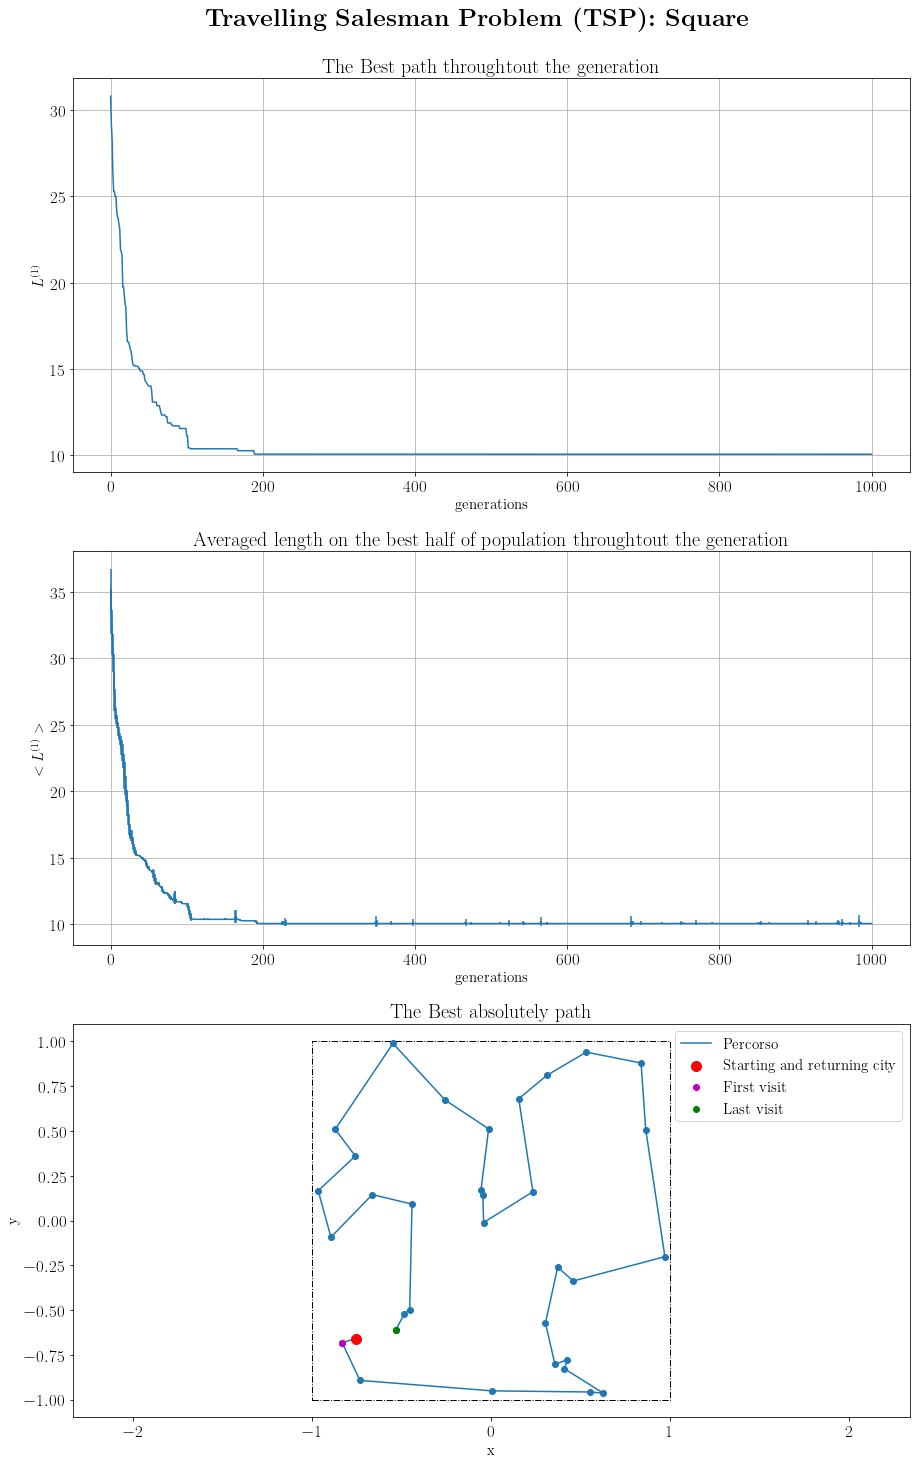

In [20]:
from matplotlib.patches import Rectangle
path ="Es 9.1/DATA/Square/"

gen, L_best = np.loadtxt(path + "Best_Individual_Evolution_square.dat", usecols=(0,1), unpack='true')
gen, L_average , error_L_average = np.loadtxt(path + "Average_Individuals_Evolution_square.dat", usecols=(0,1,2), unpack='true')
x_best,y_best = np.loadtxt(path + "Best_Individual_square.dat", usecols=(1,2), unpack='true')

print ('34 cities randomly placed inside a square')
print('The Length of the best path: ', L_best[len(L_best)-1])
print('Averaged length on the best half of the last population: ', round(L_average[len(L_average)-1],8) , '+/-', round(error_L_average[len(error_L_average)-1],8))

figure, axes = plt.subplots(3 , figsize=(15, 20))
figure.suptitle(r"\textbf{Travelling Salesman Problem (TSP): Square}", fontsize=25)
figure.subplots_adjust(top=0.93, bottom=0.0)


axes[0].plot(gen, L_best)
axes[0].set_title("The Best path throughtout the generation", fontsize = 20)
axes[0].set_xlabel('generations' , fontsize=15)
axes[0].tick_params(axis='x', labelsize= 17)
axes[0].tick_params(axis='y', labelsize= 17)
#axes[0].set_xscale("log")
axes[0].set_ylabel('$L^{(1)}$', fontsize=15)
axes[0].grid(True)


axes[1].errorbar(gen, L_average , yerr = error_L_average)
axes[1].set_title("Averaged length on the best half of population throughtout the generation ", fontsize = 20)
axes[1].set_xlabel('generations', fontsize=15)
axes[1].tick_params(axis='x', labelsize= 17)
axes[1].tick_params(axis='y', labelsize= 17)
#axes[1].set_xscale("log")
axes[1].set_ylabel('$<L^{(1)}>$', fontsize = 15)
axes[1].grid(True)

axes[2].plot(x_best,y_best,zorder=1,label = 'Percorso')
axes[2].add_patch(Rectangle((-1,-1), 2, 2, fill=False , linestyle='-.'))
axes[2].scatter(x_best,y_best,zorder=2)
axes[2].scatter(x_best[0],y_best[0],s=100,label ='Starting and returning city',color = 'r', zorder = 2)
axes[2].scatter(x_best[1],y_best[1],label ='First visit',color = 'm',zorder = 2)
axes[2].scatter(x_best[len(x_best)-1],y_best[len(y_best)-1],label ='Last visit',color = 'g',zorder = 2)
axes[2].set_title('The Best absolutely path', fontsize = 20)
axes[2].axis("equal")
axes[2].set_xlabel("x", fontsize = 15)
axes[2].set_ylabel("y", fontsize = 15)
axes[2].tick_params(axis='x', labelsize= 17)
axes[2].tick_params(axis='y', labelsize= 17)
axes[2].legend(loc="best", prop={'size': 15})



- Per entrambi i sistemi si osserva una convergenza piuttosto rapida al valore minimo della distanza del percorso ($N_{gen} \simeq 300$ per il cerchio e $N_{gen} \simeq 300$ per il quadrato), segno che l'algoritmo risulta piuttosto efficiente bilanciando correttamente i suoi principali ingredienti: la **diversificazione** e l'**intensificazione**.

- L'efficienza, probabilmente, potrebbe essere migliorata aumentando il numero di individui per popolazione e quindi esplorando simultaneamente un numero ancora maggiore di soluzioni candidate e variando opportunamente le probabilità con cui si verifica sia il crossover a singolo punto, sia le mutazioni genetiche.

- In generale, i risultati dimostrano come la formalizzazione algoritmica di un processo di evoluzione naturale (**GAs**) sia particolarmente adatto a risolvere problemi di ottimizzazione con componenti di natura stocastica intrinseche nella costruzione dell'algoritmo.

**N.B.**: Con oppurtuni comandi del makefile si può eseguire un clean dei risultati ottenuti (*clean_circle(square)*)